In [51]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
import numpy as np

import sklearn
from sklearn.naive_bayes  import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import f1_score

from feature_builder import process_dataset, add_text_embeddings, calculate_keyword_encoding
from hyperparameter_tuning import random_search

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [26]:
train_dataset = pd.read_csv('train.csv')

In [27]:
y = train_dataset.loc[:,'target']

In [28]:
asd = process_dataset(train_dataset, text_type=None)

In [29]:
X_train,X_test, y_train,y_test = train_test_split(asd, y,test_size=0.3)

In [54]:
rforest = SelectFromModel(RandomForestClassifier(random_state=1, n_estimators=1000, max_depth=4))
# Devuelve con True las cols que superan el promedio de importancia. 

In [44]:
rforest2 = RandomForestClassifier(random_state=1, n_estimators=1000, max_depth=4)

In [45]:
rforest2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [33]:
rforest.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                 class_weight=None,
                                                 criterion='gini', max_depth=4,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=1000, n_jobs=None,
                                                 oob_score=False,
                                                 r

In [34]:
rforest.get_support()

array([False, False,  True, False, False, False, False, False, False,
       False, False, False,  True, False, False, False,  True, False,
       False, False,  True,  True, False, False, False, False, False,
       False, False,  True,  True, False, False])

In [36]:
selected = X_train.columns[(rforest.get_support())]
selected

Index(['mean_encode', 'url_count', 'number_count', 'space_percentage',
       'unique_chars', 'word_density', 'capitals'],
      dtype='object')

['mean_encode', 'url_count', 'number_count', 'space_percentage', 'unique_chars', 'word_density', 'capitals']

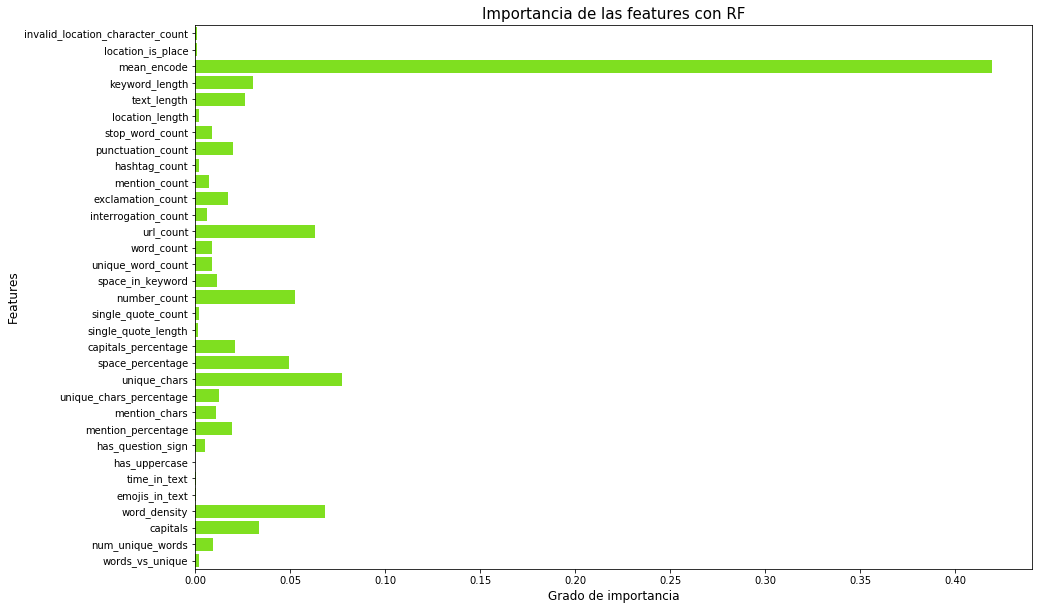

In [53]:
#En clase recomendaron usar RF para feature importance
#En base a estas metricas se puede determinar la importancia de las features para saber su efecto
g = sns.barplot(rforest2.feature_importances_, X_train.columns, orient='h', color='chartreuse')
g.set_title("Importancia de las features con RF", fontsize=15)
g.set_xlabel("Grado de importancia", fontsize=12)
g.set_ylabel("Features", fontsize=12)
fig = plt.gcf()
fig.set_size_inches(15, 10)